In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
metrics = pd.read_csv('models/metrics.csv')
winrates = pd.read_csv('models/winrates.csv')
decays = pd.read_csv('models/decays.csv', names=['decays'])

In [132]:
rewards_rl = pd.read_csv('rewards_rl.csv', names=['reward'])
rewards_opp = pd.read_csv('rewards_opp.csv', names=['reward'])

In [133]:
metrics.shape, winrates.shape, decays.shape

((5001, 7), (251, 3), (5002, 1))

In [134]:
decays.tail()

,decays
4997,0.006758
4998,0.006751
4999,0.006745
5000,0.006738
5001,0.006731


In [135]:
metrics.tail()

,episode,n_agents,value_loss_avg,value_loss_median,action_loss_avg,action_loss_median,reward_avg
4996,4996,1,11.605560,11.605560,0.327223,0.327223,0.124192
4997,4997,1,11.855265,11.855265,0.328899,0.328899,0.138564
4998,4998,1,6.757873,6.757873,0.256076,0.256076,0.109398
4999,4999,1,6.764855,6.764855,0.216766,0.216766,0.134589
5000,5000,1,93.519784,93.519784,0.256946,0.256946,0.266256


In [136]:
winrates.tail() 

,episode,vs_random,vs_fixed
246,4920,60.0,0.0
247,4940,30.0,0.0
248,4960,60.0,0.0
249,4980,60.0,0.0
250,5000,70.0,0.0


In [137]:
rewards_rl_no_dubs = rewards_rl.drop_duplicates()
rewards_opp_no_dubs = rewards_opp.drop_duplicates()
rewards_rl.shape, rewards_opp.shape, rewards_rl_no_dubs.shape, rewards_opp_no_dubs.shape

((563, 1), (241, 1), (323, 1), (53, 1))

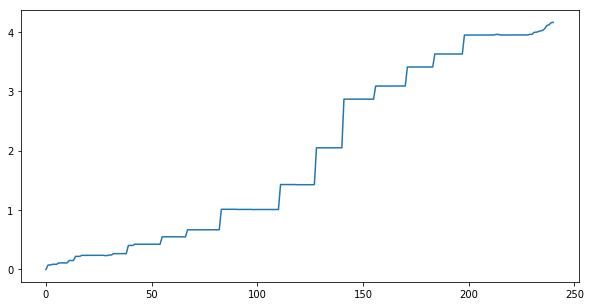

In [138]:
plt.figure(figsize=(10,5))
plt.plot(rewards_opp.index, rewards_opp.reward)
plt.show()

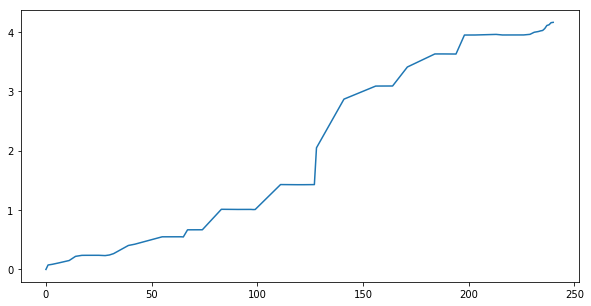

In [139]:
plt.figure(figsize=(10,5))
plt.plot(rewards_opp_no_dubs.index, rewards_opp_no_dubs.reward)
plt.show()

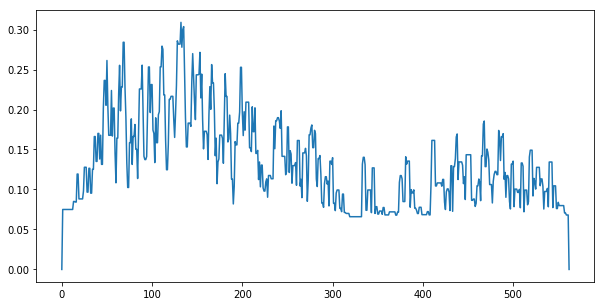

In [140]:
plt.figure(figsize=(10,5))
plt.plot(rewards_rl.index, rewards_rl.reward)
plt.show()

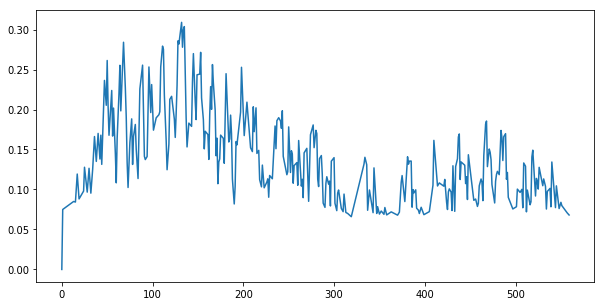

In [141]:
plt.figure(figsize=(10,5))
plt.plot(rewards_rl_no_dubs.index, rewards_rl_no_dubs.reward)
plt.show()

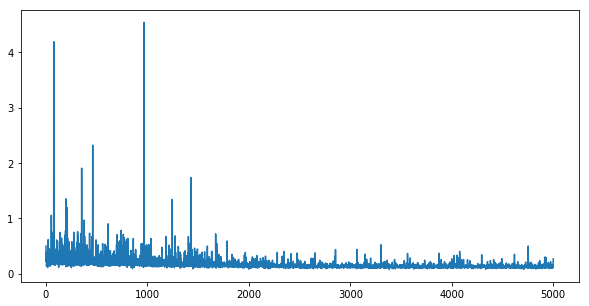

In [142]:
plt.figure(figsize=(10,5))
plt.plot(metrics.episode, metrics.reward_avg)
plt.show()

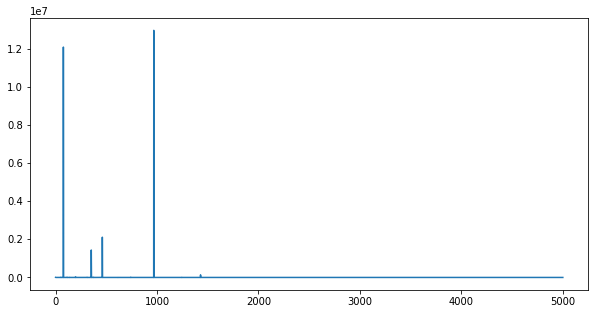

In [143]:
plt.figure(figsize=(10,5))
plt.plot(metrics.episode, metrics.value_loss_avg)
plt.show()

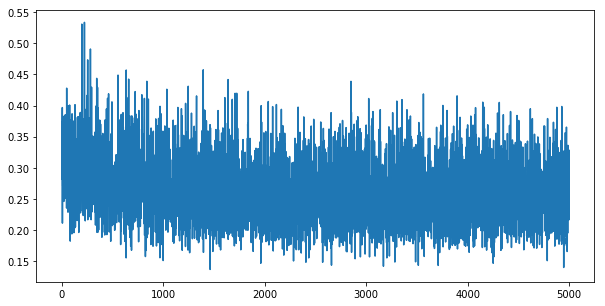

In [144]:
plt.figure(figsize=(10,5))
plt.plot(metrics.episode, metrics.action_loss_avg)
plt.show()

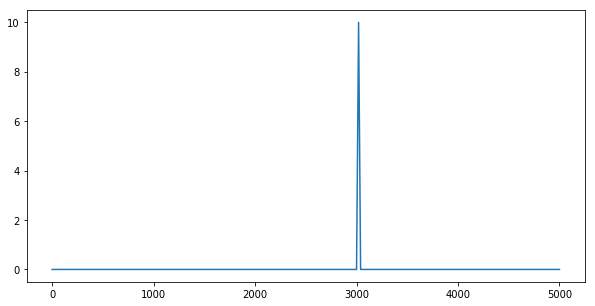

In [145]:
plt.figure(figsize=(10,5))
plt.plot(winrates.episode, winrates.vs_fixed)
plt.show()

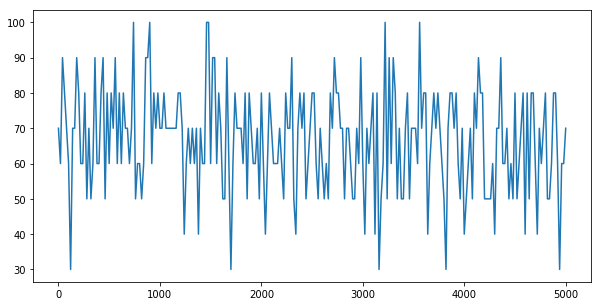

In [146]:
plt.figure(figsize=(10,5))
plt.plot(winrates.episode, winrates.vs_random)
plt.show()